<a href="https://colab.research.google.com/github/beetrandahiya/Cats-VS-Dogs/blob/master/(catsVSDogs)pretrained_model_egs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

keras=tf.keras


In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

(raw_train, raw_validation, raw_test), metadata= tfds.load('cats_vs_dogs', split=['train[:80%]','train[80%:90%]', 'train[90%:]'], with_info=True, as_supervised=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteH6T2YA/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


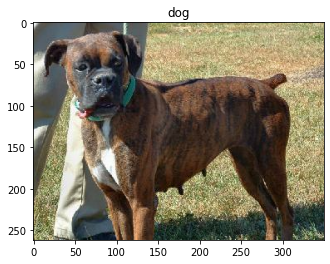

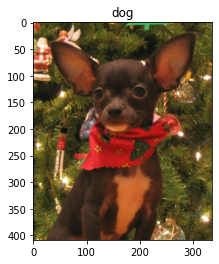

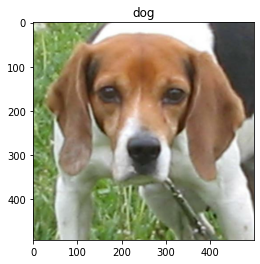

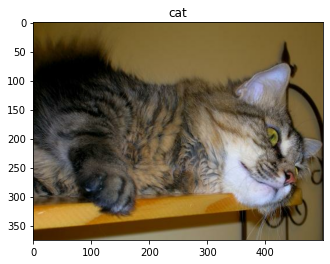

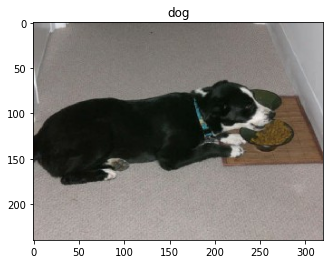

In [ ]:

get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))



In [ ]:
IMG_SIZE=160

def format_example(image,label):
    image=tf.cast(image, tf.float32)
    image = (image/127.5)- 1
    image = tf.image.resize(image,(IMG_SIZE, IMG_SIZE))
    return image, label


train= raw_train.map(format_example)
validation= raw_validation.map(format_example)
test= raw_test.map(format_example)


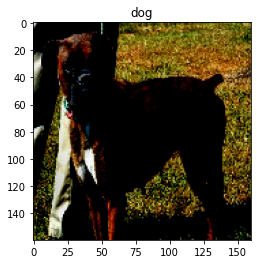

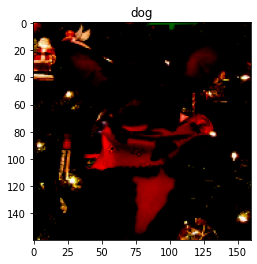

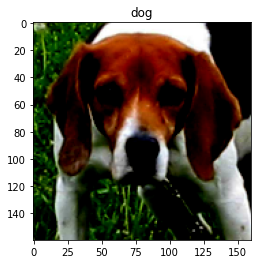

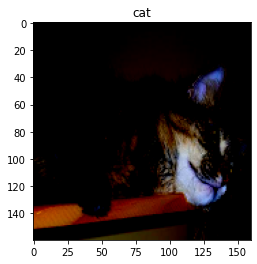

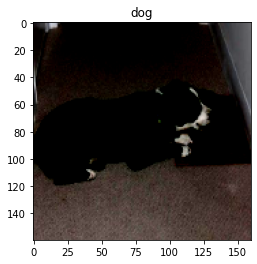

In [ ]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))


In [ ]:
BATCH_SIZE=32
SHUFFLE_BUFFER_SIZE=1000
train_batches= train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches= validation.batch(BATCH_SIZE)
test_batches= test.batch(BATCH_SIZE)



In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')


9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

In [ ]:
global_avg_layer= tf.keras.layers.GlobalAveragePooling2D()
pred_layer=keras.layers.Dense(1)



In [ ]:
model = tf.keras.Sequential([base_model, global_avg_layer, pred_layer])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
base_learn_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learn_rate), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
history= model.fit(train_batches, epochs=3 , validation_data=validation_batches)


Epoch 1/3
582/582 [==============================] - 412s 708ms/step - loss: 0.2252 - accuracy: 0.8933 - val_loss: 0.0930 - val_accuracy: 0.9669
Epoch 2/3
582/582 [==============================] - 405s 695ms/step - loss: 0.0758 - accuracy: 0.9736 - val_loss: 0.0658 - val_accuracy: 0.9755
Epoch 3/3
582/582 [==============================] - 412s 708ms/step - loss: 0.0599 - accuracy: 0.9780 - val_loss: 0.0573 - val_accuracy: 0.9785


In [ ]:
model.save("dogs_vs_cats.h5")


In [ ]:
predictions= model.predict(test_batches)


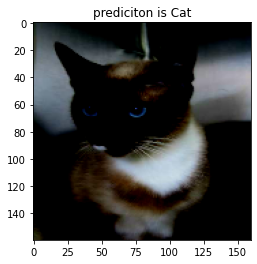

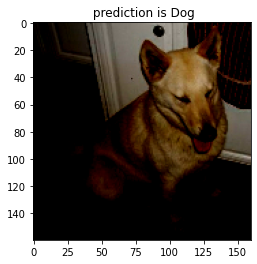

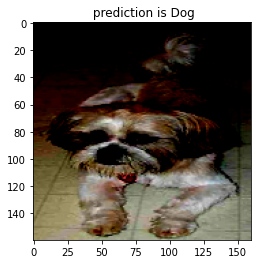

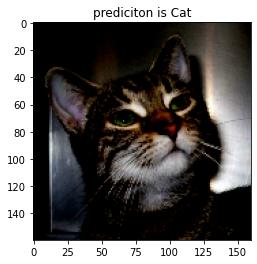

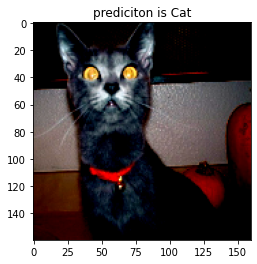

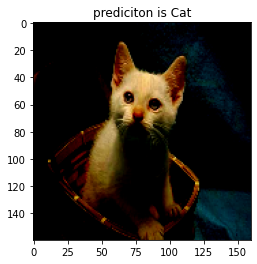

In [ ]:
i=0
for image, label in test.take(6):
    plt.figure()
    plt.imshow(image)
    if predictions[i]>0:
        plt.title(" prediction is Dog")
    elif predictions[i]<0:
        plt.title("prediciton is Cat")


    i+=1

